### Продолжим обработку данных с Твиттера. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction import text
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
PATH_TO_FILE = '../data/full_words_prep.pkl'

In [3]:
df = pd.read_pickle(PATH_TO_FILE)
df.head()

,label,tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
id,,,,,,
1,0.0,when father is dysfunctional and is so selfish...,"[when, father, is, dysfunctional, and, is, so,...","[father, dysfunctional, selfish, drags, kids, ...","[when, father, is, dysfunct, and, is, so, self...","[when, father, be, dysfunctional, and, be, so,..."
2,0.0,thanks for lyft credit cannot use cause they d...,"[thanks, for, lyft, credit, can, not, use, cau...","[thanks, lyft, credit, use, cause, offer, whee...","[thank, for, lyft, credit, can, not, use, caus...","[thank, for, lyft, credit, can, not, use, caus..."
3,0.0,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]","[bihday, your, majesti]","[bihday, your, majesty]"
4,0.0,model love you take with you all the time in ur,"[model, love, you, take, with, you, all, the, ...","[model, love, take, time, ur]","[model, love, you, take, with, you, all, the, ...","[model, love, you, take, with, you, all, the, ..."
5,0.0,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, motivation]","[factsguid, societi, now, motiv]","[factsguide, society, now, motivation]"


In [4]:
def concat_list(series: pd.Series) -> np.array:

    vector = np.vectorize(' '.join) # init resub series vector
    result = vector(series) # resub series

    return result

In [5]:
tweet_stemmed = concat_list(df['tweet_stemmed'])
tweet_stemmed

array(['when father is dysfunct and is so selfish he drag hi kid into hi dysfunct run',
       'thank for lyft credit can not use caus they do not offer wheelchair van in pdx disapoint getthank',
       'bihday your majesti', ...,
       'hillari campaign today in ohioomg amp use word like assetsampli never onc did clinton say theeword radic',
       'happi at work confer right mindset lead to cultureofdevelop organ work mindset',
       'my song so glad free download shoegaz newmus newsong'],
      dtype='<U148')

In [6]:
tweet_lemmatized = concat_list(df['tweet_lemmatized'])
tweet_lemmatized

array(['when father be dysfunctional and be so selfish he drag his kid into his dysfunction run',
       'thank for lyft credit can not use cause they do not offer wheelchair vans in pdx disapointed getthanked',
       'bihday your majesty', ...,
       'hillary campaign today in ohioomg amp use word like assetsampliability never once do clinton say theeword radicalization',
       'happy at work conference right mindset lead to cultureofdevelopment organizations work mindset',
       'my song so glad free download shoegaze newmusic newsong'],
      dtype='<U154')

### 1. Создайте мешок слов с помощью sklearn.feature_extraction.text.CountVectorizer.fit_transform(). Применим его к 'tweet_stemmed' и 'tweet_lemmatized' отдельно.
    - Игнорируем слова, частота которых в документе строго превышает порог 0.9 с помощью max_df.
    - Ограничим количество слов, попадающий в мешок, с помощью max_features = 1000.
    - Исключим стоп-слова с помощью stop_words='english'.
    - Отобразим Bag-of-Words модель как DataFrame. columns необходимо извлечь с помощью CountVectorizer.get_feature_names().

In [7]:
"""
init CountVectorizer
"""
count_vectorizer = text.CountVectorizer(
    max_df=0.9, 
    max_features=1000, 
    stop_words='english'
)
count_vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.9, max_features=1000, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [8]:
"""
vectorize to stemmed
"""
bow_stemmed_CV = count_vectorizer.fit_transform(tweet_stemmed)

X_train_CV_stem = pd.DataFrame(
    bow_stemmed_CV.toarray(), 
    columns=count_vectorizer.get_feature_names()
)
X_train_CV_stem

,abl,absolut,accept,account,act,action,actor,actual,ad,adapt,...,yeah,year,yesterday,yo,yoga,york,young,youtub,yr,yummi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
"""
vectorize to lemmatized
"""
bow_lemmatized_CV = count_vectorizer.fit_transform(tweet_lemmatized)

X_train_CV_lem = pd.DataFrame(
    bow_lemmatized_CV.toarray(),
    columns=count_vectorizer.get_feature_names()
)
X_train_CV_lem

,able,absolutely,accept,account,act,action,actor,actually,adapt,add,...,yes,yesterday,yo,yoga,york,young,youtube,yr,yrs,yummy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2. Создайте мешок слов с помощью sklearn.feature_extraction.text.TfidfVectorizer.fit_transform(). Применим его к 'tweet_stemmed' и 'tweet_lemmatized' отдельно.
    - Игнорируем слова, частота которых в документе строго превышает порог 0.9 с помощью max_df.
    - Ограничим количество слов, попадающий в мешок, с помощью max_features = 1000.
    - Исключим стоп-слова с помощью stop_words='english'.
    - Отобразим Bag-of-Words модель как DataFrame. columns необходимо извлечь с помощью TfidfVectorizer.get_feature_names().

In [10]:
"""
init TfidfVectorizer
"""
tfidf_vectorizer = text.TfidfVectorizer(
    max_df=0.9,
    max_features=1000, 
    stop_words='english'
)
tfidf_vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.9, max_features=1000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [11]:
"""
vectorize to stemmed
"""
bow_stemmed_tfidf = tfidf_vectorizer.fit_transform(tweet_stemmed)

X_train_tfidf_stem = pd.DataFrame(
    bow_stemmed_tfidf.toarray(), 
    columns=tfidf_vectorizer.get_feature_names()
)
X_train_tfidf_stem

,abl,absolut,accept,account,act,action,actor,actual,ad,adapt,...,yeah,year,yesterday,yo,yoga,york,young,youtub,yr,yummi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
"""
vectorize to lemmatized
"""
bow_lemmatized_tfidf = tfidf_vectorizer.fit_transform(tweet_lemmatized)

X_train_tfidf_lem = pd.DataFrame(
    bow_lemmatized_tfidf.toarray(),
    columns=tfidf_vectorizer.get_feature_names()
)
X_train_tfidf_lem

,able,absolutely,accept,account,act,action,actor,actually,adapt,add,...,yes,yesterday,yo,yoga,york,young,youtube,yr,yrs,yummy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3. Создайте мешок слов с помощью sklearn.feature_extraction.text.HashingVectorizer.fit_transform(). Применим его к 'tweet_stemmed' и 'tweet_lemmatized' отдельно.
    - Ограничим количество фичей, с помощью n_features = 1000.(можно изменить)
    - Исключим стоп-слова с помощью stop_words='english'.


In [13]:
"""
init HashingVectorizer
"""
hashing_vectorizer = text.HashingVectorizer(
    n_features=1000,
    stop_words='english'
)
hashing_vectorizer

HashingVectorizer(alternate_sign=True, analyzer='word', binary=False,
                  decode_error='strict', dtype=<class 'numpy.float64'>,
                  encoding='utf-8', input='content', lowercase=True,
                  n_features=1000, ngram_range=(1, 1), norm='l2',
                  preprocessor=None, stop_words='english', strip_accents=None,
                  token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None)

In [14]:
"""
vectorize to stemmed
"""
bow_stemmed_HV = hashing_vectorizer.fit_transform(tweet_stemmed)

X_train_HV_stem = pd.DataFrame(
    bow_stemmed_HV.toarray()
)
X_train_HV_stem

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
"""
lemmatize to stemmed
"""
bow_lemmatized_HV = hashing_vectorizer.fit_transform(tweet_lemmatized)

X_train_HV_lem = pd.DataFrame(
    bow_lemmatized_HV.toarray()
)
X_train_HV_lem

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 4. Проверьте ваши векторайзеры на корпусе который использовали на вебинаре, составьте таблицу метод векторизации и скор который вы получили (в методах векторизации по изменяйте параметры что бы добиться лучшего скора) обратите внимание как падает/растёт скор при уменьшении количества фичей, и изменении параметров, так же попробуйте применить к векторайзерам PCA для сокращения размерности посмотрите на качество сделайте выводы

### Подготовка тестовых данных

In [16]:
"""
corpus in DF
"""

corpus = open('corpus').read()

labels, texts = [], []

for i, line in enumerate(corpus.split('\n')):
    content = line.split()
    labels.append(content[0])
    texts.append(' '.join(content[1:]))
    
corpusDF = pd.DataFrame()
corpusDF['text'] = texts
corpusDF['label'] = labels
corpusDF['label'] = corpusDF['label'].map({'__label__2': 2, '__label__1': 1})
corpusDF.head()

,text,label
0,Stuning even for the non-gamer: This sound tra...,2
1,The best soundtrack ever to anything.: I'm rea...,2
2,Amazing!: This soundtrack is my favorite music...,2
3,Excellent Soundtrack: I truly like this soundt...,2
4,"Remember, Pull Your Jaw Off The Floor After He...",2


In [17]:
"""
Split on X & y
"""
X_corpus, y_corpus = corpusDF['text'], corpusDF['label']

### Подготовка трейновых данных

In [18]:
OBJ = 30000

X_train_stem = tweet_stemmed[:OBJ]
X_train_lem = tweet_lemmatized[:OBJ]

y_train = df['label'][:OBJ]

### Тестирование

In [19]:
results = pd.DataFrame(columns=['method']).set_index('method')

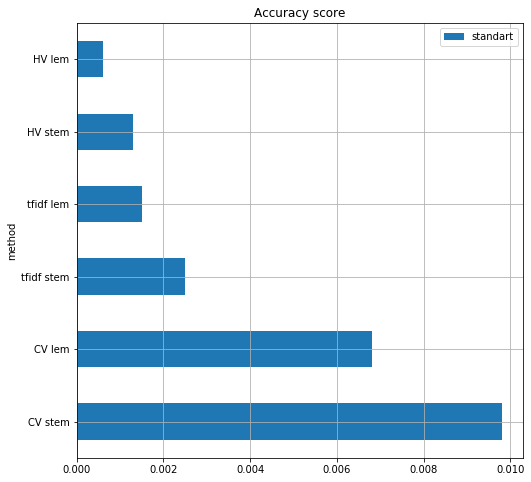

,standart
method,
CV stem,0.0098
CV lem,0.0068
tfidf stem,0.0025
tfidf lem,0.0015
HV stem,0.0013
HV lem,0.0006


In [20]:
for key_vac, val_vec in {
    'CV': text.CountVectorizer(max_df=0.9, max_features=1000, stop_words='english'), 
    'tfidf': text.TfidfVectorizer(max_df=0.9, max_features=1000, stop_words='english'), 
    'HV': text.HashingVectorizer(n_features=1000, stop_words='english')
}.items():
    
    for key_tweet, val_tweet in {
        'stem': X_train_stem, 
        'lem': X_train_lem
    }.items():
        
        X_train = val_vec.fit_transform(val_tweet)
        X_test = val_vec.transform(X_corpus)
        
        classifier = LogisticRegression()
        classifier.fit(X_train, y_train)
        
        y_test_pred = classifier.predict(X_test)
        
        results.loc[f'{key_vac} {key_tweet}', 'standart'] = accuracy_score(y_corpus, y_test_pred)

results.plot(kind='barh', grid=True, title='Accuracy score', figsize=(8, 8))
plt.show()

results

### Выводы:
- count vectorizer на стемитизированных токенах показывает лучший скор
- hashing vectorizer на лемитизированных токенах показывает худший скор

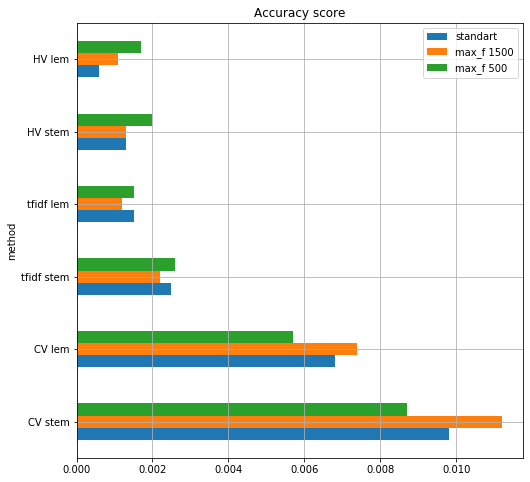

,standart,max_f 1500,max_f 500
method,,,
CV stem,0.0098,0.0112,0.0087
CV lem,0.0068,0.0074,0.0057
tfidf stem,0.0025,0.0022,0.0026
tfidf lem,0.0015,0.0012,0.0015
HV stem,0.0013,0.0013,0.0020
HV lem,0.0006,0.0011,0.0017


In [21]:
for MAX_FEATURES in (1500, 500):
    
    for key_vac, val_vec in {
        'CV': text.CountVectorizer(max_df=0.9, max_features=MAX_FEATURES, stop_words='english'), 
        'tfidf': text.TfidfVectorizer(max_df=0.9, max_features=MAX_FEATURES, stop_words='english'), 
        'HV': text.HashingVectorizer(n_features=MAX_FEATURES, stop_words='english')
    }.items():

        for key_tweet, val_tweet in {
            'stem': X_train_stem, 
            'lem': X_train_lem
        }.items():

            X_train = val_vec.fit_transform(val_tweet)
            X_test = val_vec.transform(X_corpus)

            classifier = LogisticRegression()
            classifier.fit(X_train, y_train)

            y_test_pred = classifier.predict(X_test)

            results.loc[f'{key_vac} {key_tweet}', f'max_f {MAX_FEATURES}'] = accuracy_score(y_corpus, y_test_pred)

results.plot(kind='barh', grid=True, title='Accuracy score', figsize=(8, 8))
plt.show()

results

### Выводы:
- при увеличении числа фичей count vectorizer увеличил скор, однако при уменьшении наоборот - скор упал
- у hashing vectorizer наоборот - при уменьшении числа фичей скор вырос
- у tfidf vectorizer - изменения незначительны

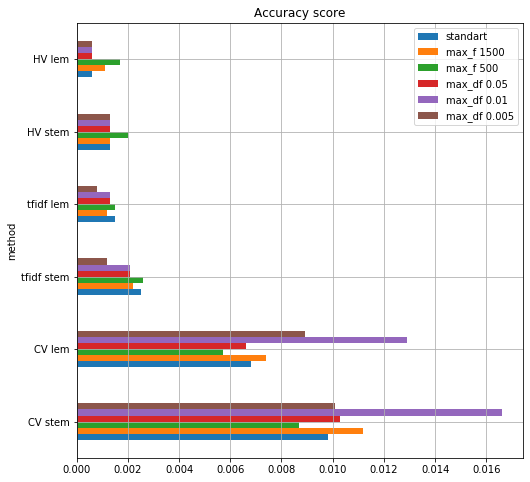

,standart,max_f 1500,max_f 500,max_df 0.05,max_df 0.01,max_df 0.005
method,,,,,,
CV stem,0.0098,0.0112,0.0087,0.0103,0.0166,0.0101
CV lem,0.0068,0.0074,0.0057,0.0066,0.0129,0.0089
tfidf stem,0.0025,0.0022,0.0026,0.0021,0.0021,0.0012
tfidf lem,0.0015,0.0012,0.0015,0.0013,0.0013,0.0008
HV stem,0.0013,0.0013,0.0020,0.0013,0.0013,0.0013
HV lem,0.0006,0.0011,0.0017,0.0006,0.0006,0.0006


In [22]:
for MAX_DF in (0.05, 0.01, 0.005):
    
    for key_vac, val_vec in {
        'CV': text.CountVectorizer(max_df=MAX_DF, max_features=1000, stop_words='english'), 
        'tfidf': text.TfidfVectorizer(max_df=MAX_DF, max_features=1000, stop_words='english'), 
        'HV': text.HashingVectorizer(n_features=1000, stop_words='english')
    }.items():

        for key_tweet, val_tweet in {
            'stem': X_train_stem, 
            'lem': X_train_lem
        }.items():

            X_train = val_vec.fit_transform(val_tweet)
            X_test = val_vec.transform(X_corpus)

            classifier = LogisticRegression()
            classifier.fit(X_train, y_train)

            y_test_pred = classifier.predict(X_test)

            results.loc[f'{key_vac} {key_tweet}', f'max_df {MAX_DF}'] = accuracy_score(y_corpus, y_test_pred)

results.plot(kind='barh', grid=True, title='Accuracy score', figsize=(8, 8))
plt.show()

results

### Выводы:
- уменьшение встречаемости слова до 0.01 сильно увеличило скор на caunt vectorizer при стемитизации и лемитизации
- на другие векторайзеры этот показатель не повлиял или повлиял отрицательно
- видимо отрезались "мусорные слова", которые путали модель

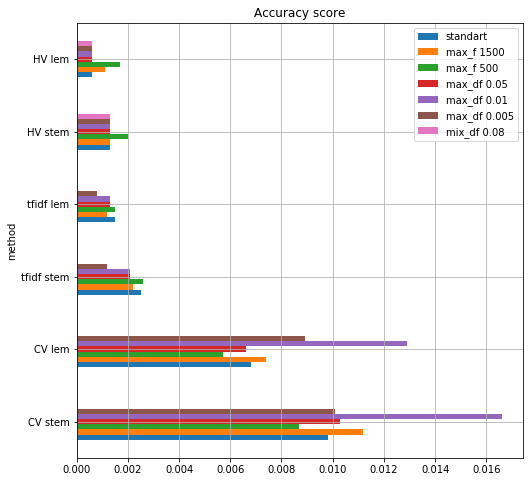

,standart,max_f 1500,max_f 500,max_df 0.05,max_df 0.01,max_df 0.005,mix_df 0.08
method,,,,,,,
CV stem,0.0098,0.0112,0.0087,0.0103,0.0166,0.0101,0.0000
CV lem,0.0068,0.0074,0.0057,0.0066,0.0129,0.0089,0.0000
tfidf stem,0.0025,0.0022,0.0026,0.0021,0.0021,0.0012,0.0000
tfidf lem,0.0015,0.0012,0.0015,0.0013,0.0013,0.0008,0.0000
HV stem,0.0013,0.0013,0.0020,0.0013,0.0013,0.0013,0.0013
HV lem,0.0006,0.0011,0.0017,0.0006,0.0006,0.0006,0.0006


In [23]:
for MIN_DF in [0.08]:
    
    for key_vac, val_vec in {
        'CV': text.CountVectorizer(max_df=0.9, min_df=MIN_DF, max_features=1000, stop_words='english'), 
        'tfidf': text.TfidfVectorizer(max_df=0.9, min_df=MIN_DF, max_features=1000, stop_words='english'), 
        'HV': text.HashingVectorizer(n_features=1000, stop_words='english')
    }.items():

        for key_tweet, val_tweet in {
            'stem': X_train_stem, 
            'lem': X_train_lem
        }.items():

            X_train = val_vec.fit_transform(val_tweet)
            X_test = val_vec.transform(X_corpus)

            classifier = LogisticRegression()
            classifier.fit(X_train, y_train)

            y_test_pred = classifier.predict(X_test)

            results.loc[f'{key_vac} {key_tweet}', f'mix_df {MIN_DF}'] = accuracy_score(y_corpus, y_test_pred)

results.plot(kind='barh', grid=True, title='Accuracy score', figsize=(8, 8))
plt.show()

results

### Вывод:
- уменьшение числа min_df привело к тому, что скор начал падать до 0, либо вообще не давал никаких изменений.
- видимо отрезались ключевые слова, которые мозволяли определить характер текста